#  Análise Preditiva de Sucesso de Startups 

Neste notebook, iremos construir modelos de aprendizado de máquina para prever o sucesso de startups com base em suas características históricas e financeiras.
# 1. Processamento

## 1.1 Importação de bibliotecas

Antes de começarmos, precisamos importar as bibliotecas que serão utilizadas em todo o processo. Cada uma tem uma função específica:

- **pandas**: manipulação e organização de dados em tabelas (DataFrames), permitindo filtragem, agregações e limpeza.
- **numpy**: operações matemáticas e manipulação eficiente de arrays e dados numéricos.
- **matplotlib.pyplot**: biblioteca básica para criação de gráficos, como linhas, barras e histogramas.
- **seaborn**: biblioteca para visualização estatística, tornando gráficos mais intuitivos e esteticamente agradáveis.
- **train_test_split**: divide os dados em conjuntos de treino e teste para avaliação de modelos.
- **cross_val_score**: avaliação robusta de modelos utilizando validação cruzada, garantindo resultados mais confiáveis.
- **accuracy_score**: métrica que calcula a proporção de previsões corretas, útil para avaliar a performance do modelo.
- **all_estimators**: lista todos os estimadores disponíveis no `scikit-learn`, facilitando a exploração de diferentes modelos rapidamente.


In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import all_estimators


## 1.2 Carregamento dos dados

Para começar nossa análise, precisamos carregar os datasets que iremos utilizar:

- **train.csv**: conjunto de dados de treinamento, contendo as features e o target (`labels`) que queremos prever.  
- **test.csv**: conjunto de dados de teste, onde faremos as previsões e compararemos posteriormente com os resultados reais (no Kaggle, por exemplo).  
- **sample_submission.csv**: arquivo de submissão de exemplo, já no formato esperado pelo Kaggle, para salvar nossas previsões finais.

Carregamos os arquivos usando a biblioteca `pandas`:


In [235]:
df = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

aqui, estamos vendo como tem que ser o resultado, vendo a tabela sample_submission.csv

In [236]:
df

,id,labels
0,70,0
1,23,0
2,389,0
3,872,0
4,920,0
...,...,...
272,406,0
273,156,0
274,610,0
275,188,0


aqui, vemos a tabela pura do teste

In [237]:
df_test

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants
0,70,1.33,3.02,3.02,3.34,9,3,11489687,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,3.3333
1,23,5.49,5.49,0.00,0.00,1,1,3170000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0000
2,389,5.84,8.22,NaN,NaN,4,3,47218498,0,1,0,0,0,0,semiconductor,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,3.3333
3,872,6.30,6.30,6.00,6.00,9,1,15000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0000
4,920,7.25,9.23,6.00,6.00,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,406,3.09,4.28,3.64,4.67,7,2,2000000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,8.5000
273,156,1.22,1.22,0.75,2.68,2,1,1350000,3,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.0000
274,610,NaN,2.34,0.06,1.58,8,2,3000000,3,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,3.5000
275,188,6.74,8.29,6.75,6.75,5,2,9000000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000


## 1.3 Visualizações dos Dataframes

### 1.3.1 Visualizando o conjunto de treinamento

Examinamos as primeiras linhas do **train.csv** para entender melhor as features e o target (`labels`).


In [238]:
df_train

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,0,0,0,0,photo_video,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,0,1,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,72,NaN,NaN,0.14,0.14,3,1,355000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1
642,276,1.79,3.30,2.08,2.33,8,3,3352194,2,0,0,0,0,1,analytics,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,9.5,0
643,298,3.70,4.10,NaN,NaN,4,2,15000000,0,0,0,1,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.0,1
644,363,5.75,5.75,8.01,9.84,4,1,1000000,2,0,1,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,1


### 1.3.2 Visualizando o conjunto de teste.

Examinamos linhas do **test.csv** para entender melhor as features e o que se espera do teste.

In [283]:
df_test

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,funding_total_usd_log,category_code_encoded,funding_duration,milestone_duration,milestones_per_year,avg_participants_per_round
0,70,1.33,3.02,3.02,3.34,9,3,2,1,0,0,0,0,0,1,1,1,0,0,3.3333,16.256960,0,1.69,0.32,0.743494,0.833325
1,23,5.49,5.49,0.00,0.00,1,1,1,1,0,0,0,0,0,0,1,0,0,0,2.0000,14.969242,32,0.00,0.00,1.000000,1.000000
2,389,5.84,8.22,-1.00,-1.00,4,3,0,1,0,0,0,0,1,0,0,0,1,1,3.3333,17.670296,28,2.38,0.00,0.000000,0.833325
3,872,6.30,6.30,6.00,6.00,9,1,1,1,0,0,0,0,0,0,0,0,0,0,3.0000,16.523561,3,0.00,0.00,1.000000,1.500000
4,920,7.25,9.23,6.00,6.00,1,3,1,0,0,1,0,0,1,0,0,1,0,0,2.6667,17.766754,27,1.98,0.00,0.335570,0.666675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,406,3.09,4.28,3.64,4.67,7,2,2,1,0,0,0,0,0,1,1,0,0,0,8.5000,14.508658,30,1.19,1.03,0.913242,2.833333
273,156,1.22,1.22,0.75,2.68,2,1,3,1,0,0,0,0,0,1,0,0,0,0,10.0000,14.115616,32,0.00,1.93,3.000000,5.000000
274,610,2.34,2.34,0.06,1.58,8,2,3,1,0,0,0,0,0,1,1,0,0,0,3.5000,14.914123,18,0.00,1.52,3.000000,1.166667
275,188,6.74,8.29,6.75,6.75,5,2,1,1,0,0,0,0,0,0,1,1,0,0,1.0000,16.012735,32,1.55,0.00,0.392157,0.333333


## 1.4 Removendo linhas duplicadas

Para garantir que nosso modelo não seja enviesado por registros repetidos, removemos **duplicatas** dos conjuntos de treino e teste.


In [239]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

## 1.5 Verificando valores ausentes

### 1.5.1 Valores ausentes de treino.

Antes de treinar o modelo, é importante **identificar se existem valores nulos** em cada coluna do conjunto de treino.  
Isso nos ajuda a decidir se precisamos preencher ou remover esses valores.


In [240]:
df_train.isnull().sum()

id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

### 1.5.2 Valores ausentes de teste.

Fazemos a mesma coisa para o teste, é importante **identificar se existem valores nulos** para o teste não dar erro.


In [241]:
df_test.isnull().sum()

id                           0
age_first_funding_year      11
age_last_funding_year        4
age_first_milestone_year    60
age_last_milestone_year     53
relationships                0
funding_rounds               0
funding_total_usd            0
milestones                   0
is_CA                        0
is_NY                        0
is_MA                        0
is_TX                        0
is_otherstate                0
category_code                0
is_software                  0
is_web                       0
is_mobile                    0
is_enterprise                0
is_advertising               0
is_gamesvideo                0
is_ecommerce                 0
is_biotech                   0
is_consulting                0
is_othercategory             0
has_VC                       0
has_angel                    0
has_roundA                   0
has_roundB                   0
has_roundC                   0
has_roundD                   0
avg_participants             0
dtype: i

## 1.6 Análise de valores nulos em colunas específicas

### 1.6.1 Coluna age_last_funding_year

Nesta etapa, vamos **identificar os registros que possuem valores ausentes** em colunas específicas do conjunto de treino.  
Não podemos simplesmente preencher todos os valores nulos com a média ou mediana, pois cada coluna pode ter **contextos diferentes**, e o tratamento adequado depende da interpretação do dado.  

A seguir, analisaremos a coluna `age_last_funding_year` para entender melhor os casos em que há valores nulos.

In [242]:
cols_with_nulls = [
    "age_last_funding_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
36,264,NaN,NaN,NaN,NaN,3,1,8500000,0,0,0,0,0,1,other,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.0,0
48,786,NaN,NaN,0.05,0.05,1,1,150000,1,0,1,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,0
56,490,NaN,NaN,0.83,0.83,1,1,2000000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0
300,604,NaN,NaN,0.04,0.04,2,1,500000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0
324,559,NaN,NaN,NaN,NaN,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,0
361,703,NaN,NaN,NaN,NaN,1,1,150000,0,0,0,0,0,1,social,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0
508,341,NaN,NaN,NaN,5.77,10,2,26000000,4,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2.5,1
537,235,NaN,NaN,NaN,7.45,9,1,4000000,4,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1
641,72,NaN,NaN,0.14,0.14,3,1,355000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1


### 1.6.2 age_first_funding_year

In [243]:
cols_with_nulls = [
    "age_first_funding_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
11,105,NaN,1.25,2.17,4.60,21,2,6000000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,4.0000,1
19,831,NaN,1.23,0.32,1.30,4,2,1400000,2,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3.0000,1
31,764,NaN,0.63,0.59,3.01,8,2,2535000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,5.0000,1
36,264,NaN,NaN,NaN,NaN,3,1,8500000,0,0,0,0,0,1,other,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.0000,0
48,786,NaN,NaN,0.05,0.05,1,1,150000,1,0,1,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0000,0
56,490,NaN,NaN,0.83,0.83,1,1,2000000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0000,0
76,380,NaN,5.01,4.95,7.37,23,4,19100000,6,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,2.5000,1
117,80,NaN,1.34,0.00,1.55,4,7,457282,2,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.0000,0
176,241,NaN,0.62,NaN,1.66,11,2,3700000,3,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3.0000,0
197,783,NaN,0.90,1.06,1.06,4,2,72000,1,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.0000,0


### 1.6.3 age_first_milestone_year

In [244]:
cols_with_nulls = [
    "age_first_milestone_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,1
5,67,1.09,1.09,NaN,NaN,5,1,20500000,0,0,0,0,0,1,software,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0
6,505,0.65,0.65,NaN,NaN,3,1,900000,0,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0
14,211,2.24,4.03,NaN,NaN,3,2,16100000,0,0,0,1,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1
15,841,0.00,0.00,NaN,NaN,21,1,5675000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,313,NaN,0.67,NaN,NaN,20,3,22500000,0,1,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,4.0,1
622,781,6.57,7.16,NaN,NaN,1,3,148000000,0,1,0,0,0,0,hardware,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,3.5,0
625,812,1.62,5.33,NaN,NaN,5,2,10000000,1,1,0,0,0,0,semiconductor,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,3.0,1
630,733,5.43,9.50,NaN,NaN,13,3,14000000,0,0,0,0,0,1,photo_video,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,3.0,1


### 1.6.4 age_last_milestone_year

In [245]:
cols_with_nulls = [
    "age_last_milestone_year"
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,1
5,67,1.09,1.09,NaN,NaN,5,1,20500000,0,0,0,0,0,1,software,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0
6,505,0.65,0.65,NaN,NaN,3,1,900000,0,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0
14,211,2.24,4.03,NaN,NaN,3,2,16100000,0,0,0,1,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1
15,841,0.00,0.00,NaN,NaN,21,1,5675000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,313,NaN,0.67,NaN,NaN,20,3,22500000,0,1,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,4.0,1
622,781,6.57,7.16,NaN,NaN,1,3,148000000,0,1,0,0,0,0,hardware,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,3.5,0
625,812,1.62,5.33,NaN,NaN,5,2,10000000,1,1,0,0,0,0,semiconductor,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,3.0,1
630,733,5.43,9.50,NaN,NaN,13,3,14000000,0,0,0,0,0,1,photo_video,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,3.0,1


## 1.7 Olhando os valores de age_first_milestone_year e age_last_milestone_year


### 1.7.1 Olhando os valores gerais dessas duas colunas.

Durante a análise dos dados, verificamos que os valores nas colunas `age_first_milestone_year` e `age_last_milestone_year` possuem significados específicos:

- **0**: indica que a startup já lançou um produto no seu **primeiro ano de existência**.  
- **-1**: indica que a startup **não realizou nenhum lançamento de produtos** até o momento.  

Portanto, quando ambas as colunas estiverem com valores `NaN`, devemos substituir por `-1`, preservando o significado original dos dados.

Também é interessante verificar os registros em que **as duas colunas têm valores iguais**, para entender padrões ou confirmar consistência nos dados.


In [284]:
# Verificar linhas onde age_first_funding_year e age_last_funding_year são iguais no treino
mask_iguais_train = df_train['age_first_milestone_year'] == df_train['age_last_milestone_year']
df_iguais_train = df_train[mask_iguais_train]
print(f"Linhas no treino com valores iguais: {df_iguais_train.shape[0]}")
df_iguais_train


Linhas no treino com valores iguais: 266


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,funding_total_usd_log,category_code_encoded,funding_duration,milestone_duration,milestones_per_year,avg_participants_per_round,situacao_funding
1,429,3.79,3.79,-1.00,-1.00,21,1,0,0,1,0,0,0,0,0,0,1,0,0,1.0,1,17.622173,0,0.0,0.0,0.0,0.500000,Apenas uma rodada de funding
5,67,1.09,1.09,-1.00,-1.00,5,1,0,0,0,0,0,1,1,0,0,0,0,0,4.0,0,16.835935,29,0.0,0.0,0.0,2.000000,Apenas uma rodada de funding
6,505,0.65,0.65,-1.00,-1.00,3,1,0,1,0,0,0,0,0,0,1,0,0,0,1.0,0,13.710151,29,0.0,0.0,0.0,0.500000,Apenas uma rodada de funding
8,284,0.00,0.00,0.74,0.74,2,1,1,1,0,0,0,0,0,1,0,0,0,0,2.0,0,10.819798,11,0.0,0.0,1.0,1.000000,Recebeu funding no 1º ano
13,749,0.00,0.00,0.33,0.33,2,1,1,0,1,0,0,0,0,0,0,0,0,0,6.0,0,14.220976,9,0.0,0.0,1.0,3.000000,Recebeu funding no 1º ano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,26,4.84,4.84,1.00,1.00,3,1,1,0,0,0,0,1,0,0,0,0,1,0,4.0,1,16.380460,29,0.0,0.0,1.0,2.000000,Apenas uma rodada de funding
640,337,0.00,0.00,3.41,3.41,3,1,1,1,0,0,0,0,0,1,0,0,0,0,3.0,0,12.429220,19,0.0,0.0,1.0,1.500000,Recebeu funding no 1º ano
641,72,-1.00,-1.00,0.14,0.14,3,1,1,1,0,0,0,0,0,1,0,0,0,0,1.0,1,12.779876,29,0.0,0.0,1.0,0.500000,Nunca recebeu funding
643,298,3.70,4.10,-1.00,-1.00,4,2,0,0,0,1,0,0,0,0,0,1,0,0,5.0,1,16.523561,8,0.4,0.0,0.0,1.666667,Múltiplas rodadas de funding


## 1.7.2 Análise de linhas com `age_last_milestone_year` igual a 0

Em nossa análise dos dados, identificamos que o valor **0** na coluna `age_last_milestone_year` indica que a startup **lançou seu primeiro produto no primeiro ano de atividade**. O intuito disso é ver se: quando os valores de 0 na coluna age_last_milestone_year repetem na coluna age_first_milestone_year, representando que a startup só lançou um produto em seu lançamento. Isso finaliza nossa hipótese de que 0 representa que as startups lançaram o produto em seu lançamento.


In [247]:
# Verificar linhas onde age_last_milestone_year é 0 no treino
mask_last0_train = df_train['age_last_milestone_year'] == 0
df_last0_train = df_train[mask_last0_train]
print(f"Linhas no treino com valores iguais: {df_last0_train.shape[0]}")
df_last0_train

Linhas no treino com valores iguais: 13


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
123,532,0.02,0.02,0.0,0.0,1,1,30000,1,0,0,0,0,1,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.0,0
137,317,0.08,0.08,0.0,0.0,1,1,31000,1,0,1,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.0,0
159,631,0.77,0.77,0.0,0.0,1,1,50000,1,1,0,0,0,0,messaging,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0
225,828,1.28,1.28,0.0,0.0,1,1,15000,1,0,0,0,0,1,ecommerce,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0
305,407,0.67,1.93,0.0,0.0,2,2,10800000,1,0,1,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,2.0,0
386,716,0.68,0.79,0.0,0.0,2,2,125000,1,0,0,0,0,1,analytics,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0
394,168,0.00,0.00,0.0,0.0,2,1,15000,1,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0
422,570,0.68,1.45,0.0,0.0,2,2,21189,1,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.0,0
475,667,0.67,0.67,0.0,0.0,2,1,2600000,1,1,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0
514,469,0.00,0.00,0.0,0.0,2,1,20000,1,0,0,0,0,1,fashion,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0


## 1.7.3 Análise de linhas com `age_first_milestone_year` igual a -1

Em nossa análise dos dados, identificamos que o valor **-1** na coluna `age_last_milestone_year` indica que a startup **não lançou seu produto**. O intuito disso é ver se: quando os valores de -1 na coluna age_first_milestone_year repetem na coluna age_last_milestone_year, representando que a startup nunca lançou produtos. Assim, podemos concluir que seria adequado colocar 

In [249]:
# Verificar linhas onde age_first_milestone_year é -1 no treino
mask_menos1_train = df_train['age_first_milestone_year'] == -1
df_menos1_train = df_train[mask_menos1_train]
print(f"Linhas no treino com valores iguais: {df_menos1_train.shape[0]}")
df_menos1_train

Linhas no treino com valores iguais: 0


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels


### 1.7.4 Tratamento de valores nulos nas colunas age_first_milestone_year e age_last_milestone_year.

Nesta etapa, aplicamos um tratamento específico para as colunas `age_first_milestone_year` e 
`age_last_milestone_year`, seguindo a análise feita anteriormente:

1. **Criação de colunas auxiliares (`has_col`)**  
   Para cada coluna (`age_first_milestone_year` e `age_last_milestone_year`), foi criada 
   uma nova variável binária (`has_age_first_milestone_year` e `has_age_last_milestone_year`).  
   - `1` indica que havia um valor informado.  
   - `0` indica que o valor original era nulo.

2. **Preenchimento dos valores nulos**  
   Os valores `NaN` dessas colunas foram substituídos por `-1`, que representa o caso em que 
   **a startup não possui nenhum lançamento registrado**.

Esse tratamento garante que:
- As informações sobre presença/ausência de dados fiquem preservadas.  
- As colunas principais possam ser utilizadas diretamente em modelos de Machine Learning.


In [250]:
for col in ['age_first_milestone_year', 'age_last_milestone_year']:
    df_train[f'has_{col}'] = df_train[col].notnull().astype(int)
    df_test[f'has_{col}'] = df_test[col].notnull().astype(int)
    df_train[col].fillna(-1, inplace=True)
    df_test[col].fillna(-1, inplace=True)

/tmp/ipykernel_153608/669924623.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(-1, inplace=True)
/tmp/ipykernel_153608/669924623.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

### 1.7.6 Vereficação se deu certo.

In [251]:
cols_with_nulls = [
    "age_last_milestone_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year


In [252]:
cols_with_nulls = [
    "age_first_milestone_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year


### 1.8 Tratamento das colunas `age_first_funding_year` e `age_last_funding_year`

Nesta etapa, foi realizada uma análise específica para tratar os valores ausentes 
(`NaN`) nas colunas relacionadas a anos de captação de recursos:

1. **Valores iguais a `0`**  
   Verificamos que o valor `0` nessas colunas não significa ausência de funding.  
   Na verdade, indica que a startup recebeu investimento já em seu **primeiro ano de operação**.

2. **Quando `age_first_funding_year` é `NaN` e `age_last_funding_year` possui valor**  
   Esse cenário indica que há registro de funding, mas o valor inicial não foi informado.  
   Nesse caso, **substituímos o valor `NaN` da coluna `age_first_funding_year` 
   pelo valor existente em `age_last_funding_year`**.

3. **Quando ambas as colunas são `NaN`**  
   Após a análise, concluímos que isso significa que a startup **nunca recebeu funding**.  
   Seguindo a mesma lógica aplicada às colunas de marcos (`milestone_year`), 
   substituímos ambos os `NaN` por **`-1`**, representando explicitamente 
   a ausência de captação.

Com esse tratamento, preservamos o significado real dos valores `0`, evitamos perda 
de informação ao preencher apenas onde havia referência cruzada e garantimos que 
o modelo de aprendizado de máquina consiga distinguir startups com e sem funding.


### 1.8.1 Análise das colunas

In [253]:
cols_with_nulls = [
    "age_first_funding_year",
]

df_nulos_age_first_funding_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_first_funding_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year
11,105,NaN,1.25,2.17,4.60,21,2,6000000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,4.0000,1,1,1
19,831,NaN,1.23,0.32,1.30,4,2,1400000,2,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3.0000,1,1,1
31,764,NaN,0.63,0.59,3.01,8,2,2535000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,5.0000,1,1,1
36,264,NaN,NaN,-1.00,-1.00,3,1,8500000,0,0,0,0,0,1,other,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.0000,0,0,0
48,786,NaN,NaN,0.05,0.05,1,1,150000,1,0,1,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0000,0,1,1
56,490,NaN,NaN,0.83,0.83,1,1,2000000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0000,0,1,1
76,380,NaN,5.01,4.95,7.37,23,4,19100000,6,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,2.5000,1,1,1
117,80,NaN,1.34,0.00,1.55,4,7,457282,2,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.0000,0,1,1
176,241,NaN,0.62,-1.00,1.66,11,2,3700000,3,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3.0000,0,0,1
197,783,NaN,0.90,1.06,1.06,4,2,72000,1,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.0000,0,1,1


In [254]:
cols_with_nulls = [
    "age_last_funding_year",
]

df_nulos_age_last_funding_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_funding_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year
36,264,NaN,NaN,-1.00,-1.00,3,1,8500000,0,0,0,0,0,1,other,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.0,0,0,0
48,786,NaN,NaN,0.05,0.05,1,1,150000,1,0,1,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,0,1,1
56,490,NaN,NaN,0.83,0.83,1,1,2000000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,1
300,604,NaN,NaN,0.04,0.04,2,1,500000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0,1,1
324,559,NaN,NaN,-1.00,-1.00,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,0,0,0
361,703,NaN,NaN,-1.00,-1.00,1,1,150000,0,0,0,0,0,1,social,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0,0,0
508,341,NaN,NaN,-1.00,5.77,10,2,26000000,4,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2.5,1,0,1
537,235,NaN,NaN,-1.00,7.45,9,1,4000000,4,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1,0,1
641,72,NaN,NaN,0.14,0.14,3,1,355000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,1,1


In [255]:
# Verificar linhas onde age_first_funding_year e age_last_funding_year são iguais no treino
mask_fundingiguais_train = df_train['age_first_funding_year'] == df_train['age_last_funding_year']
df_fundingiguais_train = df_train[mask_fundingiguais_train]
print(f"Linhas no treino com valores iguais: {df_fundingiguais_train.shape[0]}")
df_fundingiguais_train


Linhas no treino com valores iguais: 205


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year
1,429,3.79,3.79,-1.00,-1.00,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,1,0,0
5,67,1.09,1.09,-1.00,-1.00,5,1,20500000,0,0,0,0,0,1,software,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,0,0,0
6,505,0.65,0.65,-1.00,-1.00,3,1,900000,0,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,0,0
8,284,0.00,0.00,0.74,0.74,2,1,50000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.0,0,1,1
13,749,0.00,0.00,0.33,0.33,2,1,1500000,1,0,1,0,0,0,fashion,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,646,3.09,3.09,1.00,1.00,4,1,13400000,1,1,0,0,0,0,public_relations,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2.0,1,1,1
635,26,4.84,4.84,1.00,1.00,3,1,13000000,1,0,0,0,0,1,software,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.0,1,1,1
640,337,0.00,0.00,3.41,3.41,3,1,250000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3.0,0,1,1
644,363,5.75,5.75,8.01,9.84,4,1,1000000,2,0,1,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,1,1,1


In [256]:
# Verificar linha onde age_first_funding_year é igual a 0 no treino
mask_funding0_train = df_train['age_first_funding_year'] == 0
df_funding0_train = df_train[mask_funding0_train]
print(f"Linhas no treino com valores iguais: {df_funding0_train.shape[0]}")
df_funding0_train

Linhas no treino com valores iguais: 38


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year
8,284,0.0,0.00,0.74,0.74,2,1,50000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.0000,0,1,1
13,749,0.0,0.00,0.33,0.33,2,1,1500000,1,0,1,0,0,0,fashion,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.0000,0,1,1
15,841,0.0,0.00,-1.00,-1.00,21,1,5675000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0000,1,0,0
59,495,0.0,2.43,2.43,2.50,8,2,9030000,2,0,1,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,4.0000,0,1,1
63,557,0.0,2.75,3.33,5.24,9,2,20000000,2,0,0,1,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,1
68,202,0.0,0.00,-1.00,-1.00,1,1,45000000,0,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0000,0,0,0
71,41,0.0,4.80,3.72,7.62,26,4,33000000,5,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,3.0000,1,1,1
84,890,0.0,3.45,2.02,3.98,9,4,36000000,3,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3.0000,1,1,1
95,898,0.0,5.30,5.00,5.00,17,4,34700000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,2.2500,1,1,1
104,843,0.0,0.00,-1.00,-1.00,2,1,125000,0,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.0000,0,0,0


In [257]:
# Verificar linha onde age_first_funding_year é igual a -1 no treino
mask_funding1_train = df_train['age_first_funding_year'] == -1
df_funding1_train = df_train[mask_funding1_train]
print(f"Linhas no treino com valores iguais: {df_funding1_train.shape[0]}")
df_funding1_train

Linhas no treino com valores iguais: 0


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year


In [258]:
# Preencher age_first_funding_year com o valor de age_last_funding_year quando apenas o primeiro for NaN
mask = df_train['age_first_funding_year'].isnull() & df_train['age_last_funding_year'].notnull()
df_train.loc[mask, 'age_first_funding_year'] = df_train.loc[mask, 'age_last_funding_year']

In [259]:
# Preencher age_first_funding_year com o valor de age_last_funding_year quando apenas o primeiro for NaN no teste
mask_test = df_test['age_first_funding_year'].isnull() & df_test['age_last_funding_year'].notnull()
df_test.loc[mask_test, 'age_first_funding_year'] = df_test.loc[mask_test, 'age_last_funding_year']

In [260]:
cols_with_nulls = [
    "age_first_funding_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year
36,264,NaN,NaN,-1.00,-1.00,3,1,8500000,0,0,0,0,0,1,other,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.0,0,0,0
48,786,NaN,NaN,0.05,0.05,1,1,150000,1,0,1,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,0,1,1
56,490,NaN,NaN,0.83,0.83,1,1,2000000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,1
300,604,NaN,NaN,0.04,0.04,2,1,500000,1,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0,1,1
324,559,NaN,NaN,-1.00,-1.00,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,0,0,0
361,703,NaN,NaN,-1.00,-1.00,1,1,150000,0,0,0,0,0,1,social,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0,0,0
508,341,NaN,NaN,-1.00,5.77,10,2,26000000,4,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2.5,1,0,1
537,235,NaN,NaN,-1.00,7.45,9,1,4000000,4,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1,0,1
641,72,NaN,NaN,0.14,0.14,3,1,355000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,1,1


In [261]:
# Preencher age_first_funding_year e age_last_funding_year com -1 quando apenas os dois forem NaN
mask_1 = df_train['age_first_funding_year'].isnull() & df_train['age_last_funding_year'].isnull()
df_train.loc[mask_1, 'age_first_funding_year'] = -1
df_train.loc[mask_1, 'age_last_funding_year'] = -1

In [262]:
# Preencher age_first_funding_year e age_last_funding_year com -1 quando apenas os dois forem NaN
mask_1_test = df_test['age_first_funding_year'].isnull() & df_test['age_last_funding_year'].isnull()
df_test.loc[mask_1_test, 'age_first_funding_year'] = -1
df_test.loc[mask_1_test, 'age_last_funding_year'] = -1

In [263]:
cols_with_nulls = [
    "age_first_funding_year",
]

df_nulos_age_last_milestone_year= df_train[df_train[cols_with_nulls].isnull().any(axis=1)].copy()

df_nulos_age_last_milestone_year

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year


agora, para confirmar a limpeza, vamos ver se não sobrou valores nulos.

In [264]:
df_train.isnull().sum()

id                              0
age_first_funding_year          0
age_last_funding_year           0
age_first_milestone_year        0
age_last_milestone_year         0
relationships                   0
funding_rounds                  0
funding_total_usd               0
milestones                      0
is_CA                           0
is_NY                           0
is_MA                           0
is_TX                           0
is_otherstate                   0
category_code                   0
is_software                     0
is_web                          0
is_mobile                       0
is_enterprise                   0
is_advertising                  0
is_gamesvideo                   0
is_ecommerce                    0
is_biotech                      0
is_consulting                   0
is_othercategory                0
has_VC                          0
has_angel                       0
has_roundA                      0
has_roundB                      0
has_roundC    

In [265]:
df_test.isnull().sum()

id                              0
age_first_funding_year          0
age_last_funding_year           0
age_first_milestone_year        0
age_last_milestone_year         0
relationships                   0
funding_rounds                  0
funding_total_usd               0
milestones                      0
is_CA                           0
is_NY                           0
is_MA                           0
is_TX                           0
is_otherstate                   0
category_code                   0
is_software                     0
is_web                          0
is_mobile                       0
is_enterprise                   0
is_advertising                  0
is_gamesvideo                   0
is_ecommerce                    0
is_biotech                      0
is_consulting                   0
is_othercategory                0
has_VC                          0
has_angel                       0
has_roundA                      0
has_roundB                      0
has_roundC    

In [266]:
df_train['funding_total_usd_log'] = np.log1p(df_train['funding_total_usd'])
df_test['funding_total_usd_log'] = np.log1p(df_test['funding_total_usd'])

In [267]:
df_train = df_train.drop(['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'], axis=1)
df_test = df_test.drop(['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'], axis=1)

In [268]:
df_train

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year,funding_total_usd_log
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,0,0,0,0,enterprise,1,1,0,0,0,0,1.0,0,1,1,15.223444
1,429,3.79,3.79,-1.00,-1.00,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,1,0,0,1.0,1,0,0,17.622173
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,0,0,0,0,photo_video,1,0,1,0,0,0,1.0,0,1,1,15.464169
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,0,1,0,0,advertising,0,1,0,1,0,0,2.0,1,1,1,16.489659
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,0,0,0,0,web,0,0,1,1,1,1,2.8,1,1,1,18.064006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,72,-1.00,-1.00,0.14,0.14,3,1,355000,1,1,0,0,0,0,software,0,1,0,0,0,0,1.0,1,1,1,12.779876
642,276,1.79,3.30,2.08,2.33,8,3,3352194,2,0,0,0,0,1,analytics,0,1,1,0,0,0,9.5,0,1,1,15.025126
643,298,3.70,4.10,-1.00,-1.00,4,2,15000000,0,0,0,1,0,0,enterprise,0,0,0,1,0,0,5.0,1,0,0,16.523561
644,363,5.75,5.75,8.01,9.84,4,1,1000000,2,0,1,0,0,0,software,0,0,1,0,0,0,3.0,1,1,1,13.815512


In [269]:
# Transformando category_code em valores inteiros (categóricos)
df_train['category_code_encoded'] = df_train['category_code'].astype('category').cat.codes
df_test['category_code_encoded'] = df_test['category_code'].astype('category').cat.codes

# Se você tiver colunas booleanas (True/False), transforme em 1/0
bool_cols = df_train.select_dtypes(include=['bool']).columns
for col in bool_cols:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)


df_train['category_code_encoded'] = df_train['category_code_encoded'].astype(int)

In [270]:
df_train = df_train.drop(['category_code', 'funding_total_usd'], axis=1)
df_test = df_test.drop(['category_code', 'funding_total_usd'] , axis=1)

In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            646 non-null    int64  
 1   age_first_funding_year        646 non-null    float64
 2   age_last_funding_year         646 non-null    float64
 3   age_first_milestone_year      646 non-null    float64
 4   age_last_milestone_year       646 non-null    float64
 5   relationships                 646 non-null    int64  
 6   funding_rounds                646 non-null    int64  
 7   milestones                    646 non-null    int64  
 8   is_CA                         646 non-null    int64  
 9   is_NY                         646 non-null    int64  
 10  is_MA                         646 non-null    int64  
 11  is_TX                         646 non-null    int64  
 12  is_otherstate                 646 non-null    int64  
 13  has_V

In [272]:
df_train

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year,funding_total_usd_log,category_code_encoded
0,719,10.42,13.09,8.98,12.72,4,3,3,1,0,0,0,0,1,1,0,0,0,0,1.0,0,1,1,15.223444,8
1,429,3.79,3.79,-1.00,-1.00,21,1,0,0,1,0,0,0,0,0,0,1,0,0,1.0,1,0,0,17.622173,0
2,178,0.71,2.28,1.95,2.28,5,2,2,1,0,0,0,0,1,0,1,0,0,0,1.0,0,1,1,15.464169,22
3,197,3.00,5.00,9.62,10.39,16,2,2,0,0,1,0,0,0,1,0,1,0,0,2.0,1,1,1,16.489659,0
4,444,0.66,5.88,6.21,8.61,29,5,4,1,0,0,0,0,0,0,1,1,1,1,2.8,1,1,1,18.064006,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,72,-1.00,-1.00,0.14,0.14,3,1,1,1,0,0,0,0,0,1,0,0,0,0,1.0,1,1,1,12.779876,29
642,276,1.79,3.30,2.08,2.33,8,3,2,0,0,0,0,1,0,1,1,0,0,0,9.5,0,1,1,15.025126,1
643,298,3.70,4.10,-1.00,-1.00,4,2,0,0,0,1,0,0,0,0,0,1,0,0,5.0,1,0,0,16.523561,8
644,363,5.75,5.75,8.01,9.84,4,1,2,0,1,0,0,0,0,0,1,0,0,0,3.0,1,1,1,13.815512,29


In [273]:
# Diferença entre último e primeiro funding
df_train['funding_duration'] = df_train['age_last_funding_year'] - df_train['age_first_funding_year']
df_test['funding_duration'] = df_test['age_last_funding_year'] - df_test['age_first_funding_year']

# Diferença entre último e primeiro milestone
df_train['milestone_duration'] = df_train['age_last_milestone_year'] - df_train['age_first_milestone_year']
df_test['milestone_duration'] = df_test['age_last_milestone_year'] - df_test['age_first_milestone_year']


In [274]:
# Média de milestones por ano de funding
df_train['milestones_per_year'] = df_train['milestones'] / (df_train['funding_duration'] + 1)
df_test['milestones_per_year'] = df_test['milestones'] / (df_test['funding_duration'] + 1)

# Participantes por funding round
df_train['avg_participants_per_round'] = df_train['avg_participants'] / (df_train['funding_rounds'] + 1)
df_test['avg_participants_per_round'] = df_test['avg_participants'] / (df_test['funding_rounds'] + 1)


In [275]:
df_train

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,has_age_first_milestone_year,has_age_last_milestone_year,funding_total_usd_log,category_code_encoded,funding_duration,milestone_duration,milestones_per_year,avg_participants_per_round
0,719,10.42,13.09,8.98,12.72,4,3,3,1,0,0,0,0,1,1,0,0,0,0,1.0,0,1,1,15.223444,8,2.67,3.74,0.817439,0.250000
1,429,3.79,3.79,-1.00,-1.00,21,1,0,0,1,0,0,0,0,0,0,1,0,0,1.0,1,0,0,17.622173,0,0.00,0.00,0.000000,0.500000
2,178,0.71,2.28,1.95,2.28,5,2,2,1,0,0,0,0,1,0,1,0,0,0,1.0,0,1,1,15.464169,22,1.57,0.33,0.778210,0.333333
3,197,3.00,5.00,9.62,10.39,16,2,2,0,0,1,0,0,0,1,0,1,0,0,2.0,1,1,1,16.489659,0,2.00,0.77,0.666667,0.666667
4,444,0.66,5.88,6.21,8.61,29,5,4,1,0,0,0,0,0,0,1,1,1,1,2.8,1,1,1,18.064006,33,5.22,2.40,0.643087,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,72,-1.00,-1.00,0.14,0.14,3,1,1,1,0,0,0,0,0,1,0,0,0,0,1.0,1,1,1,12.779876,29,0.00,0.00,1.000000,0.500000
642,276,1.79,3.30,2.08,2.33,8,3,2,0,0,0,0,1,0,1,1,0,0,0,9.5,0,1,1,15.025126,1,1.51,0.25,0.796813,2.375000
643,298,3.70,4.10,-1.00,-1.00,4,2,0,0,0,1,0,0,0,0,0,1,0,0,5.0,1,0,0,16.523561,8,0.40,0.00,0.000000,1.666667
644,363,5.75,5.75,8.01,9.84,4,1,2,0,1,0,0,0,0,0,1,0,0,0,3.0,1,1,1,13.815512,29,0.00,1.83,2.000000,1.500000


In [276]:
df_test

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_age_first_milestone_year,has_age_last_milestone_year,funding_total_usd_log,category_code_encoded,funding_duration,milestone_duration,milestones_per_year,avg_participants_per_round
0,70,1.33,3.02,3.02,3.34,9,3,2,1,0,0,0,0,0,1,1,1,0,0,3.3333,1,1,16.256960,0,1.69,0.32,0.743494,0.833325
1,23,5.49,5.49,0.00,0.00,1,1,1,1,0,0,0,0,0,0,1,0,0,0,2.0000,1,1,14.969242,32,0.00,0.00,1.000000,1.000000
2,389,5.84,8.22,-1.00,-1.00,4,3,0,1,0,0,0,0,1,0,0,0,1,1,3.3333,0,0,17.670296,28,2.38,0.00,0.000000,0.833325
3,872,6.30,6.30,6.00,6.00,9,1,1,1,0,0,0,0,0,0,0,0,0,0,3.0000,1,1,16.523561,3,0.00,0.00,1.000000,1.500000
4,920,7.25,9.23,6.00,6.00,1,3,1,0,0,1,0,0,1,0,0,1,0,0,2.6667,1,1,17.766754,27,1.98,0.00,0.335570,0.666675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,406,3.09,4.28,3.64,4.67,7,2,2,1,0,0,0,0,0,1,1,0,0,0,8.5000,1,1,14.508658,30,1.19,1.03,0.913242,2.833333
273,156,1.22,1.22,0.75,2.68,2,1,3,1,0,0,0,0,0,1,0,0,0,0,10.0000,1,1,14.115616,32,0.00,1.93,3.000000,5.000000
274,610,2.34,2.34,0.06,1.58,8,2,3,1,0,0,0,0,0,1,1,0,0,0,3.5000,1,1,14.914123,18,0.00,1.52,3.000000,1.166667
275,188,6.74,8.29,6.75,6.75,5,2,1,1,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,16.012735,32,1.55,0.00,0.392157,0.333333


começo das análises exploratória

In [277]:
# Exibir todas as colunas
pd.set_option('display.max_columns', None)

# Visão geral
print(df_train.shape)      # dimensões
print(df_train.info())     # tipos de dados e nulos
print(df_train.describe()) # estatísticas básicas

(646, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            646 non-null    int64  
 1   age_first_funding_year        646 non-null    float64
 2   age_last_funding_year         646 non-null    float64
 3   age_first_milestone_year      646 non-null    float64
 4   age_last_milestone_year       646 non-null    float64
 5   relationships                 646 non-null    int64  
 6   funding_rounds                646 non-null    int64  
 7   milestones                    646 non-null    int64  
 8   is_CA                         646 non-null    int64  
 9   is_NY                         646 non-null    int64  
 10  is_MA                         646 non-null    int64  
 11  is_TX                         646 non-null    int64  
 12  is_otherstate                 646 non-null    int64  


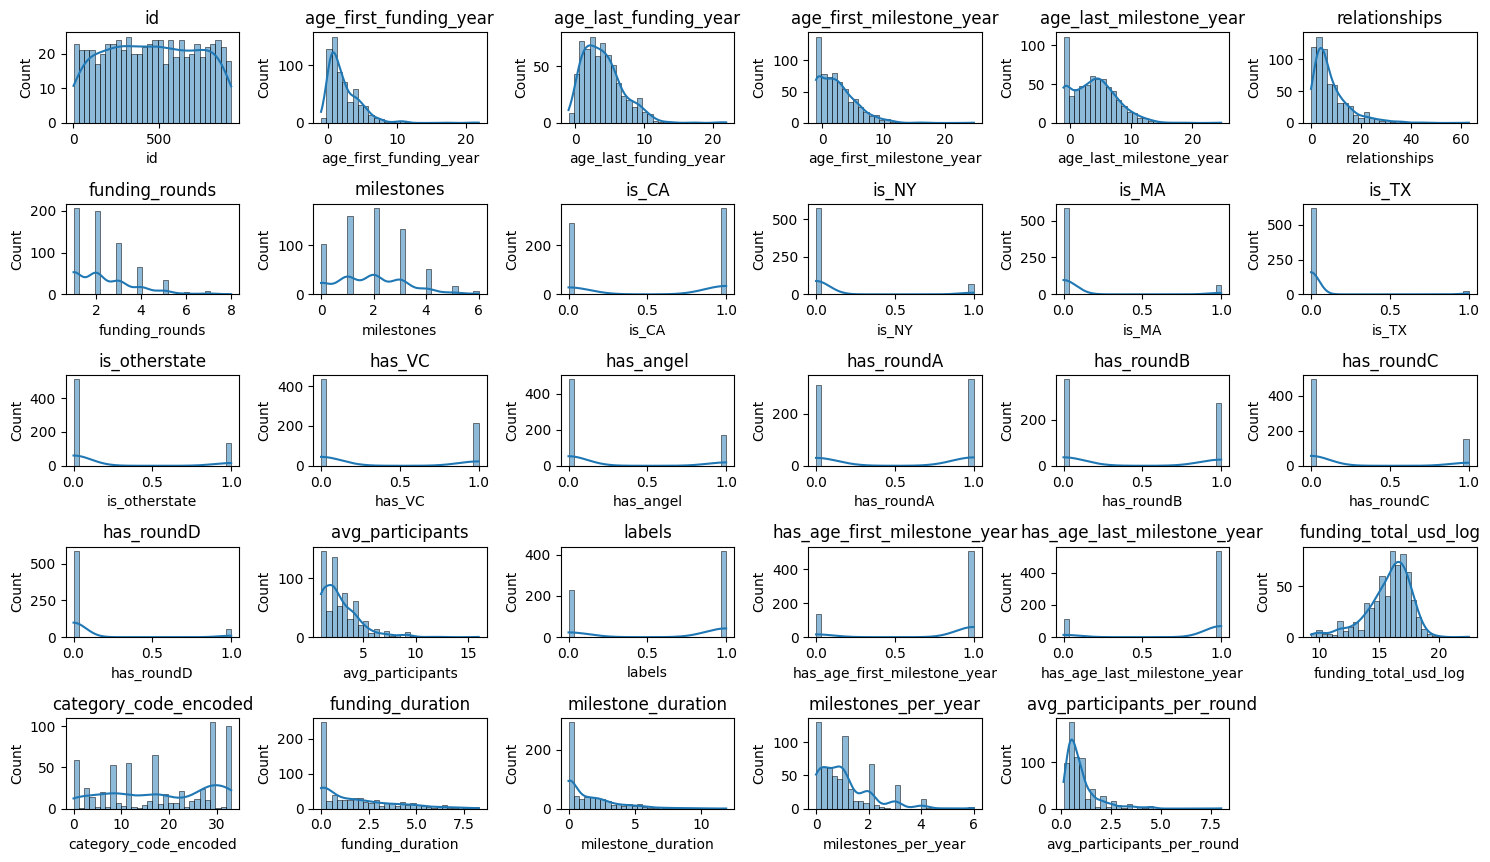

In [278]:
num_cols = df_train.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 6, i)
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


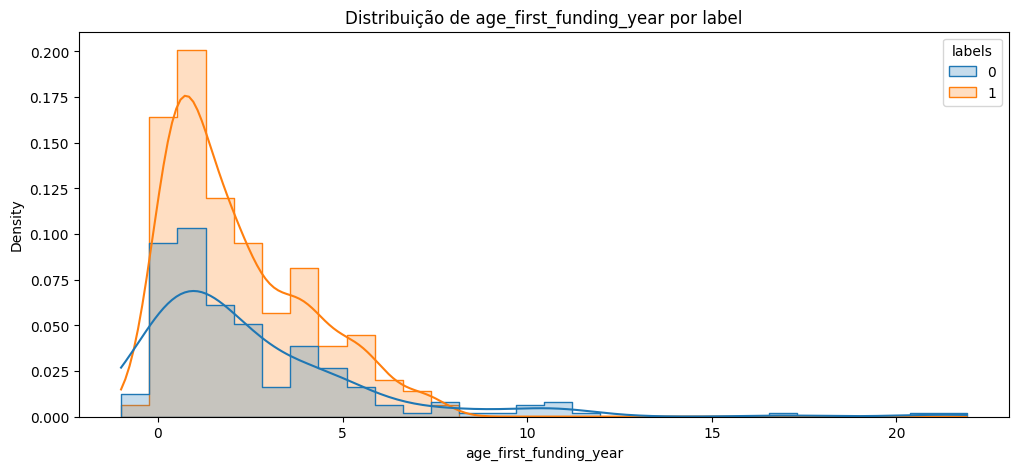

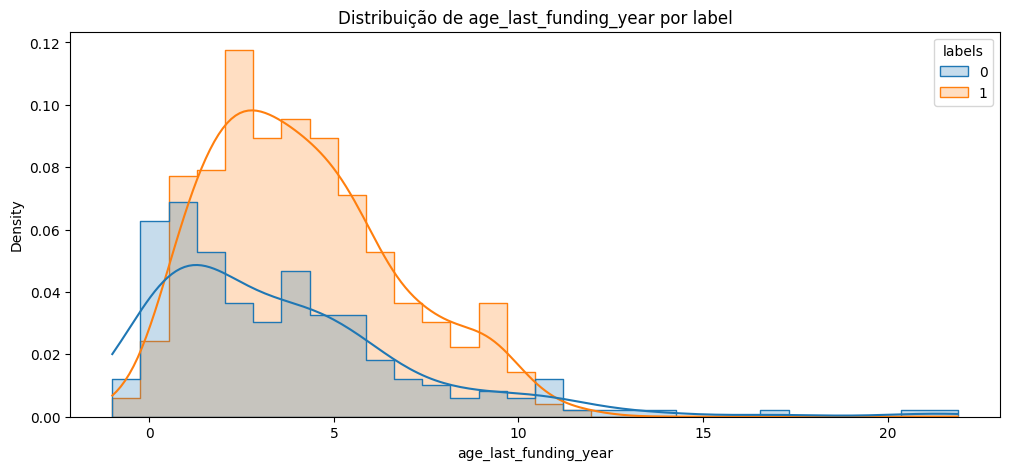

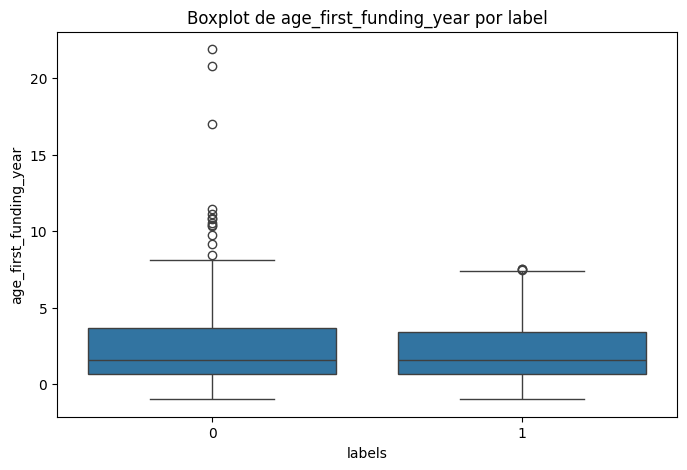

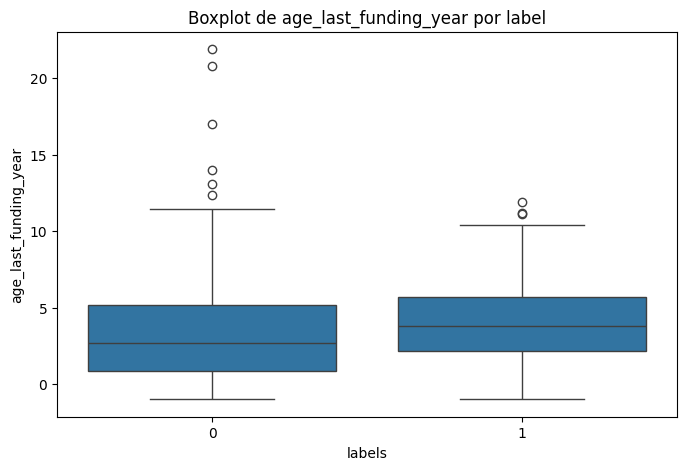

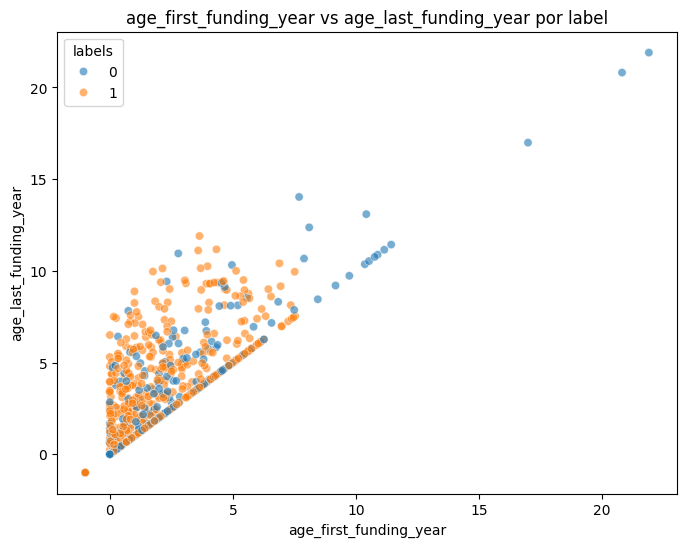

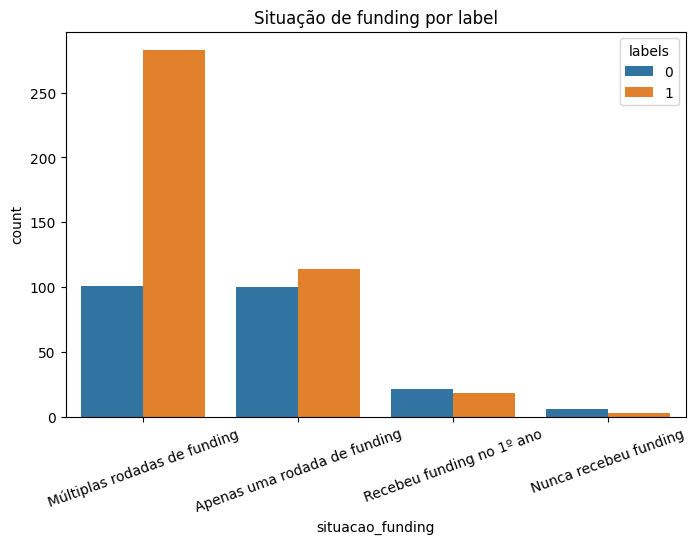

In [279]:


# 1. Distribuição de age_first_funding_year e age_last_funding_year por label
plt.figure(figsize=(12,5))
sns.histplot(data=df_train, x='age_first_funding_year', hue='labels', kde=True, bins=30, element='step', stat='density')
plt.title('Distribuição de age_first_funding_year por label')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df_train, x='age_last_funding_year', hue='labels', kde=True, bins=30, element='step', stat='density')
plt.title('Distribuição de age_last_funding_year por label')
plt.show()

# 2. Boxplot das idades de funding por label
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x='labels', y='age_first_funding_year')
plt.title('Boxplot de age_first_funding_year por label')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x='labels', y='age_last_funding_year')
plt.title('Boxplot de age_last_funding_year por label')
plt.show()

# 3. Relação entre age_first_funding_year e age_last_funding_year
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_train, x='age_first_funding_year', y='age_last_funding_year', hue='labels', alpha=0.6)
plt.title('age_first_funding_year vs age_last_funding_year por label')
plt.show()

# 4. Contagem de startups por situação de funding
situacoes = []
for _, row in df_train.iterrows():
    if row['age_first_funding_year'] == -1 and row['age_last_funding_year'] == -1:
        situacoes.append('Nunca recebeu funding')
    elif row['age_first_funding_year'] == 0:
        situacoes.append('Recebeu funding no 1º ano')
    elif row['age_first_funding_year'] == row['age_last_funding_year']:
        situacoes.append('Apenas uma rodada de funding')
    else:
        situacoes.append('Múltiplas rodadas de funding')
df_train['situacao_funding'] = situacoes
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='situacao_funding', hue='labels')
plt.title('Situação de funding por label')
plt.xticks(rotation=20)
plt.show()


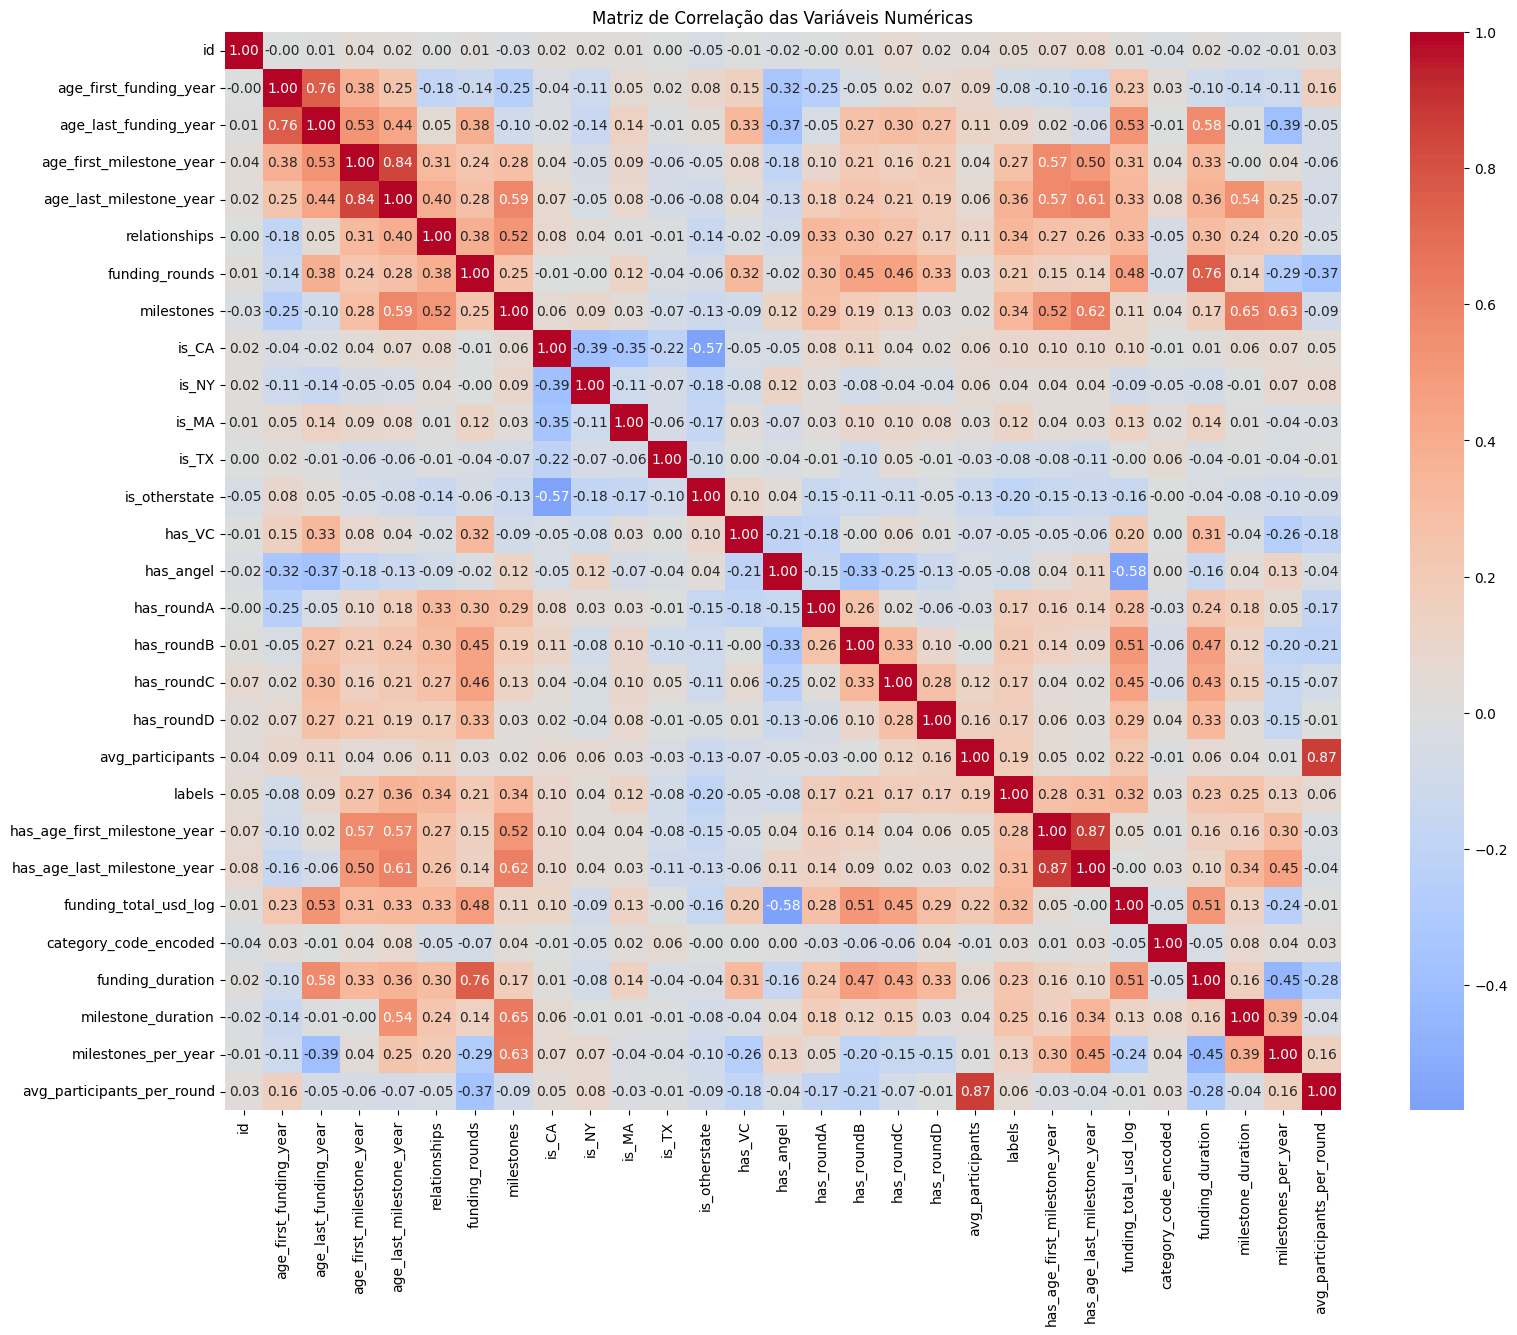

In [280]:
# Matriz de correlação das variáveis numéricas
plt.figure(figsize=(18, 14))
corr = df_train.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

agora, com base na matriz de correlação, será feita a separação das features que usaremos.

In [281]:
# Removendo colunas irrelevantes segundo a matriz de correlação e contexto do projeto
cols_irrelevantes = [
    'has_age_first_milestone_year',  # Flags de presença de dado, pouco informativas após tratamento
    'has_age_last_milestone_year'
]

df_train = df_train.drop(cols_irrelevantes, axis=1)
df_test = df_test.drop([col for col in cols_irrelevantes if col in df_test.columns], axis=1)

agora, iremos colocar esses dados processados em um dataframe separado

In [282]:
df_train.to_csv('train_processado.csv', index=False)
df_test.to_csv('test_processado.csv', index=False)